### Create and save a basic logistic regression classifier

Create a logistic classifier and save as pickled object. Attempt to parse to PMML

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import pickle

In [2]:
%matplotlib inline

In [3]:
def regress_params(clf):
    """Get the parameters of an sklearn logistic classifier. 
    Internally uses pickle to serialize the classifier object.
    
    ::params clf: a logistic regression classifier 
    
    ::returns m: tuple of type, type. The classifier type, and __builtin__ type
    ::returns d: dict. Dictionary of the trained model parameters. 
    """
    s = pickle.dumps(clf)
    l = s.split("\n(dp")
    try:
        m = pickle.loads("(csklearn." + (l[0].rsplit("\n",1)[0] + "\n.").split("sklearn.")[1])
    except "EOFError":
        m = None
        print("Unexpected sklearn classifier format.")
    if len(l) == 2:
        # the pickled representation ends in "b." which needs to be replaced by "."
        d = pickle.loads("(dp" + l[1].rstrip("b.") + ".")
    else:
        print("Encountered unexpected pickle format containing %d dicts." %(len(l) - 1))
        d = None
    
    return m, d

### Single intput, single output

In [4]:
x = np.linspace(0., 1., 101)
y = np.less_equal(x, 0.5).astype('float')
x = x.reshape((x.shape[0],1))

In [5]:
clf = LogisticRegression(C = 10)
clf.fit(x, y)
mo, do = regress_params(clf)
print do
print mo

{'intercept_': array([ 5.41291243]), 'C': 10, 'classes_': array([ 0.,  1.]), 'verbose': 0, 'fit_intercept': True, 'max_iter': 100, 'class_weight': None, 'n_iter_': 5, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'coef_': array([[-10.83484785]]), 'solver': 'liblinear', 'intercept_scaling': 1}
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, <type 'object'>, None)


In [6]:
clf = LogisticRegressionCV()
clf.fit(x, y)
mo, do = regress_params(clf)
print do
print mo

Encountered unexpected pickle format containing 4 dicts.
None
(<class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, <type 'object'>, None)


In [7]:
y_pred = clf.predict_proba(x)
#y_ref = 1/(1 + np.exp(-6.93 * (x-0.49)))
y_ref = 1/(1 + np.exp(-10.68 * (x-0.5)))

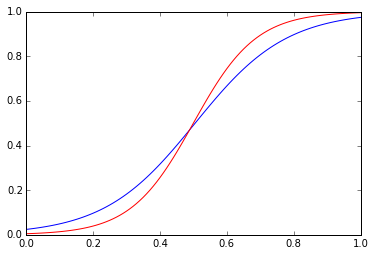

In [8]:
plt.plot(x, y_pred[:,0])
plt.plot(x,y_ref,c='red')
plt.show()

In [9]:
with open('simple_logistic_C10.pkl', 'wb') as fl:
    pickle.dump(clf, fl)

In [10]:
import pickletools

### Multiple input, single output

In [11]:
def create_grid(x1_min, x1_max, x2_min, x2_max, num_points=101):
    """
    Create a grid with num_points points in each dimension. 
    
    x1_min, x1_max, x2_min, x2_max: float, the grid limits
    num_points: int
    """
    dx1 = (x1_max - x1_min) / (num_points - 1)
    dx2 = (x2_max - x2_min) / (num_points - 1)
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, dx1),
                         np.arange(x2_min, x2_max, dx2))
    return xx, yy

In [12]:
X1, X2 = create_grid(0., 1., 0., 1.)
Y = np.transpose(np.less_equal(X1 + X2, 0.5).astype('float'))

In [13]:
x1 = X1.reshape(X1.shape[0]*X1.shape[1])
x2 = X2.reshape(X2.shape[0]*X2.shape[1])
y= Y.reshape(Y.shape[0]*Y.shape[1])
X = np.vstack((x1, x2)).T
y.shape

(10000,)

In [14]:
clf = LogisticRegression(C = 10)

In [15]:
clf.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [16]:
mo, do = regress_params(clf)
print do
print mo

{'intercept_': array([ 16.77226485]), 'C': 10, 'classes_': array([ 0.,  1.]), 'verbose': 0, 'fit_intercept': True, 'max_iter': 100, 'class_weight': None, 'n_iter_': 10, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'coef_': array([[-33.42420441, -33.42420441]]), 'solver': 'liblinear', 'intercept_scaling': 1}
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, <type 'object'>, None)


### Multiple input, three class

In [17]:
X1, X2 = create_grid(0., 1., 0., 1.)
Y1 = np.transpose(np.less_equal(X1, 0.5).astype('float'))
Y2 = np.transpose(np.less_equal(X2, 0.5).astype('float'))
Y = Y1 + Y2

In [18]:
x1 = X1.reshape(X1.shape[0]*X1.shape[1])
x2 = X2.reshape(X2.shape[0]*X2.shape[1])
y= Y.reshape(Y.shape[0]*Y.shape[1])
X = np.vstack((x1, x2)).T
y.shape

(10000,)

In [19]:
clf = LogisticRegression(C=10.)

In [20]:
clf.fit(X, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [21]:
mo, do = regress_params(clf)
print do
print mo

{'intercept_': array([-16.12765105,  -0.11953183,   8.29645763]), 'C': 10.0, 'classes_': array([ 0.,  1.,  2.]), 'verbose': 0, 'fit_intercept': True, 'max_iter': 100, 'class_weight': None, 'n_iter_': 7, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'coef_': array([[ 12.28949534,  12.28949534],
       [  0.11993549,   0.11993549],
       [-11.9283637 , -11.9283637 ]]), 'solver': 'liblinear', 'intercept_scaling': 1}
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, <type 'object'>, None)
